# Project: Customer Churn Prediction (End-to-End ML)

## STEP 1 — Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## STEP 2 — Load Dataset 

In [2]:


df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


## STEP 3 — Data Cleaning (Preprocessing)

In [4]:
# Convert TotalCharges to numeric (coerce errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop only rows where TotalCharges is NaN
print("Rows before cleaning:", df.shape[0])
df = df[df['TotalCharges'].notna()]
print("Rows after cleaning:", df.shape[0])

# Map Churn to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Rows before cleaning: 7043
Rows after cleaning: 7032


## STEP 4 — Drop CustomerID

In [1]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

NameError: name 'df' is not defined

## STEP 5 — Exploratory Data Analysis (EDA)

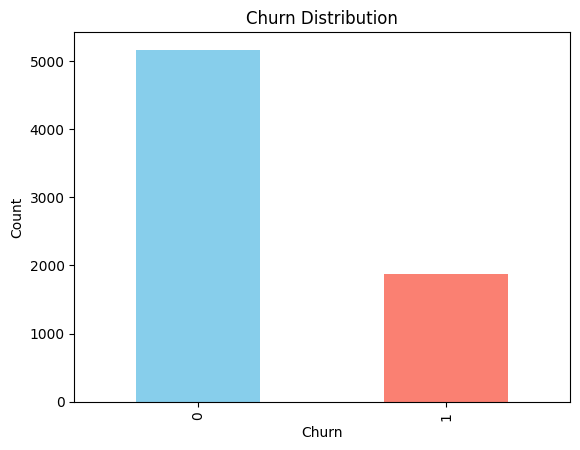

In [6]:
if 'Churn' in df.columns and not df['Churn'].empty:
    df['Churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
    plt.title("Churn Distribution")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.show()
else:
    print("Churn column missing or empty!")

## STEP 6 — Encode Categorical Features

In [7]:
df = pd.get_dummies(df, drop_first=True)
print("After Encoding Shape:", df.shape)

After Encoding Shape: (7032, 31)


In [8]:
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## STEP 7 — Train Test Split

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (5625, 30) Test shape: (1407, 30)


## STEP 8 — Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## STEP 9 — Model Training

### MODEL 1 — Logistic Regression (Baseline)

In [11]:
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\n===== Logistic Regression =====")
print("Accuracy:", round(accuracy_score(y_test, lr_pred)*100,2), "%")
print(classification_report(y_test, lr_pred))



===== Logistic Regression =====
Accuracy: 72.64 %
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



### MODEL 2 — Random Forest

In [12]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n===== Random Forest =====")
print("Accuracy:", round(accuracy_score(y_test, rf_pred)*100,2), "%")
print(classification_report(y_test, rf_pred))


===== Random Forest =====
Accuracy: 77.11 %
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.55      0.72      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



### MODEL 3 — Gradient Boosting

In [13]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("\n===== Gradient Boosting =====")
print("Accuracy:", round(accuracy_score(y_test, gb_pred)*100,2), "%")
print(classification_report(y_test, gb_pred))


===== Gradient Boosting =====
Accuracy: 79.6 %
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## STEP 9 — Confusion Matrices

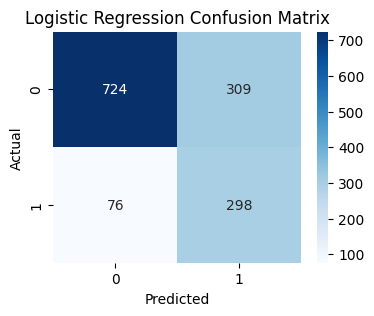

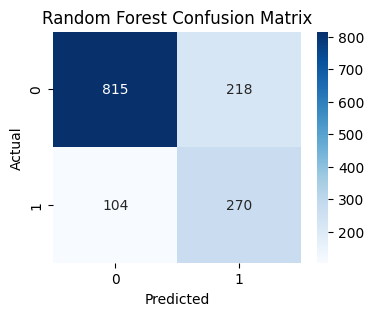

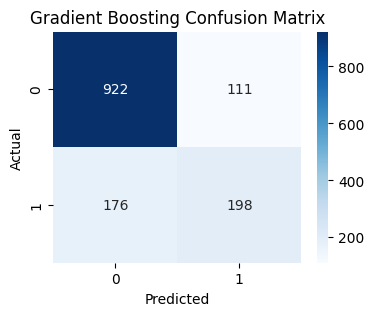

In [16]:
models = {'Logistic Regression': lr_pred, 'Random Forest': rf_pred, 'Gradient Boosting': gb_pred}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## STEP 11 — Final Model Selection

In [18]:
print("\n Gradient Boosting selected as final model due to highest accuracy and strong recall.")


 Gradient Boosting selected as final model due to highest accuracy and strong recall.


In [19]:
import pickle

In [20]:
with open("gb_model.pkl", "wb") as f:
    pickle.dump(gb, f)